In [1]:
import torch
from torch import nn
import cv2
import numpy as np

from dream_utils import *
from image_utils import *
from loss_utils import *
from imagenet1000 import imagenet_classes

In [2]:
def setup_network(model):
    model.eval()
    for param in model.parameters():
        param.requires_grad = False

def print_imagenet_classes(classes):
    for c in classes:
        print("{}: {}".format(c, imagenet_classes[c]))

# Load/Set Up Network

In [3]:
# Call this when rerunning to clear unused memory
torch.cuda.empty_cache()

In [4]:
from torchvision import models

net = models.resnet34(pretrained=True).to("cuda")

setup_network(net)
handles = []

print("Network:")
print(net)

Network:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace

# Set Up Loss

In [5]:
# One interesting choice of loss is final layer ImageNet classes:
num_classes = 10
classes_selected = list(np.random.randint(1000, size=num_classes))
print_imagenet_classes(classes_selected)

# layername, weight, channels(None for all channels)
loss_weights = [
    (('fc'), 1., classes_selected)
]

# Alternatively can choose inner layers:
loss_weights = [
    (('layer2'), .5, None),
    (('layer3'), .5, None)
]

# TODO: change loss weights during iteration

# Clear existing handles
for handle in handles:
    handle.remove()

# and generate new loss function
loss_fn, handles = get_loss_fn(net, loss_weights)

415: bakery, bakeshop, bakehouse
493: chiffonier, commode
791: shopping cart
484: catamaran
545: electric fan, blower
882: vacuum, vacuum cleaner
510: container ship, containership, container vessel
208: Labrador retriever
662: modem
322: ringlet, ringlet butterfly


# Load Image

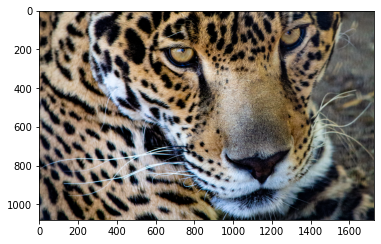

In [6]:
import matplotlib.pyplot as plt

image = load_img("./leopard.png")
image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
image = image[1100:1100+1080, :1920]
plt.imshow(image)
plt.show()

# Run DeepDream

In [7]:
zoom_config = {
    'lr': .002,
    'num_iters': 3,
    'num_octaves': 3,
    'zoom_amount': .015,
    'rotation_degrees': .3,
    'num_frames': 40,
    'output_dir': './leopard_resnet',
    # "Ease in" parameters, which allow you to gradually start the zoom
    'num_ease_in_frames': 0,
    'ease_in_power': 1.5
}

deepdream_zoom(image, zoom_config, loss_fn)

0, average time: 2.6270
10, average time: 0.6340
20, average time: 0.5380
30, average time: 0.5033
